<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Ran Wurmbrand, 315366039   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [282]:
import matplotlib.pyplot as plt
import numpy as np



### **2. Data**

Generate a 2D dataset

In [283]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)
print(X)

(2000, 2)
[[ 6.09230605  4.93736405]
 [ 0.63017801  4.35689457]
 [ 0.89648472  6.6829703 ]
 ...
 [-1.13666826  7.55707451]
 [ 4.62701984  0.69787801]
 [ 0.56054828  0.10796921]]


Plot the data to explore how many clusters it contains

C:\Users\user\AppData\Local\Temp\ipykernel_19864\1871301639.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


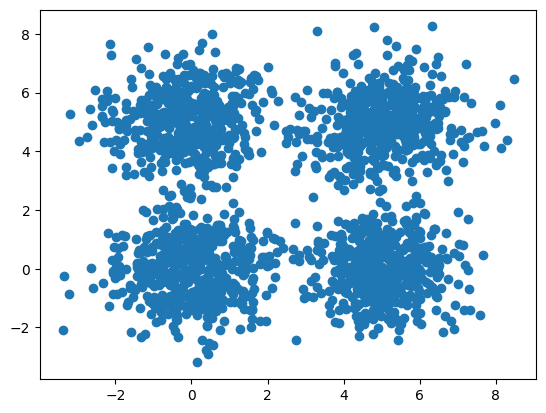

In [284]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [285]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False), :]
        for i in range(self.max_iter):
            self.labels_ = np.array([self.predict(X[j]) for j in range(X.shape[0])])
            self.labels_history.append(self.labels_.copy())
            self.centroids_history.append(self.centroids.copy())
            self.centroids = self._update_centroids()
            current_cost = self._calculate_cost()
            self.costs.append(current_cost)
            if i > 0 and self.costs[i] == self.costs[i-1]:
                break
                
    def predict(self, X):
        distances = np.array([np.sum((centroid - X)**2) for centroid in self.centroids])
        return np.argmin(distances)
    def _get_distances(self, X):
        return None

    def _get_labels(self, X):
        #### YOUR CODE HERE ####
        return None

    def _update_centroids(self):
        new_centroids = np.zeros((self.n_clusters, self.X_fit_.shape[1]))
        for k in range(self.n_clusters):
            points = self.X_fit_[self.labels_ == k]
            if points.size:
                new_centroids[k] = np.mean(points, axis=0)
        return new_centroids

    def _get_centroids(self, X, labels):
        #### YOUR CODE HERE ####
        return None
    
    def _calculate_cost(self):
        cost = 0
        for i in range(len(self.X_fit_)):
            point = self.X_fit_[i]
            centroid = self.centroids[self.labels_[i]]
            cost += np.sum((point - centroid) ** 2)
        return cost



Run the algorithm on the 2D dataset

In [286]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)


Plot a graph of the costs as a function of the iterations

[9863.360302414896, 9049.684838938523, 6504.050240148786, 4079.9458877556067, 3920.057783551895, 3920.057783551895]
[0 2 2 ... 2 3 1]
[array([3, 0, 2, ..., 2, 3, 1], dtype=int64), array([3, 0, 2, ..., 2, 3, 1], dtype=int64), array([3, 2, 2, ..., 2, 3, 1], dtype=int64), array([0, 2, 2, ..., 2, 3, 1], dtype=int64), array([0, 2, 2, ..., 2, 3, 1], dtype=int64), array([0, 2, 2, ..., 2, 3, 1], dtype=int64)]


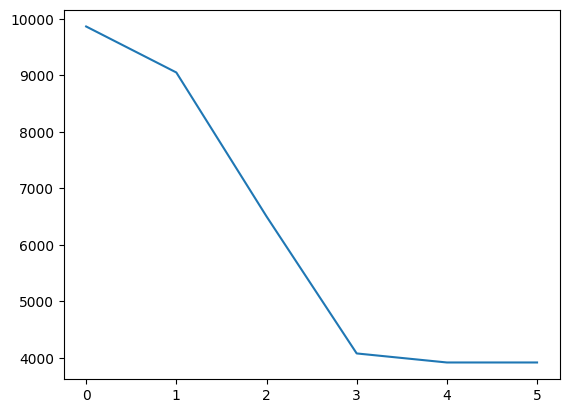

In [287]:
costs = kmeans.costs
plt.plot(costs)
print(costs)
print(kmeans.labels_)
print(kmeans.labels_history)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: <br>
3 clusters: <br>
4 clusters: <br>
6 clusters: <br>
8 clusters: <br>
10 clusters: <br>
20 clusters: <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

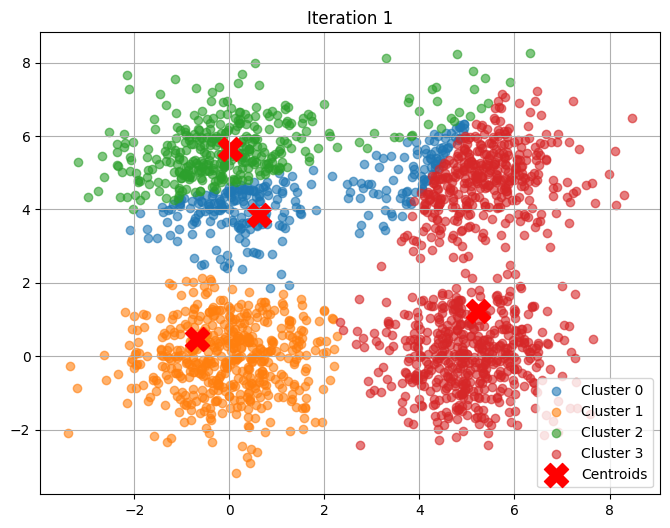

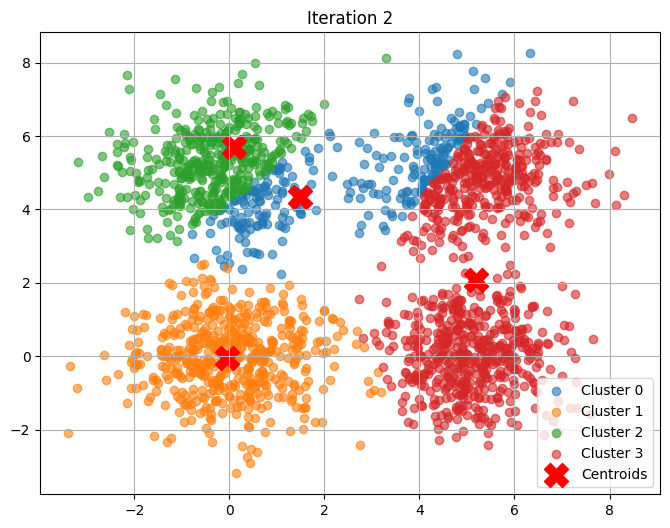

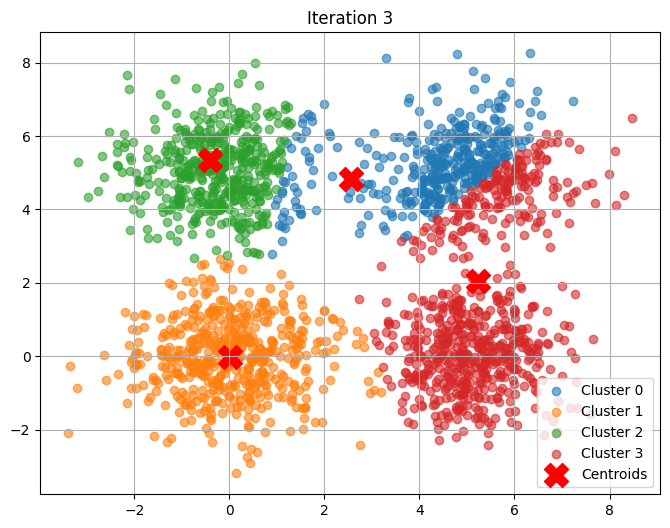

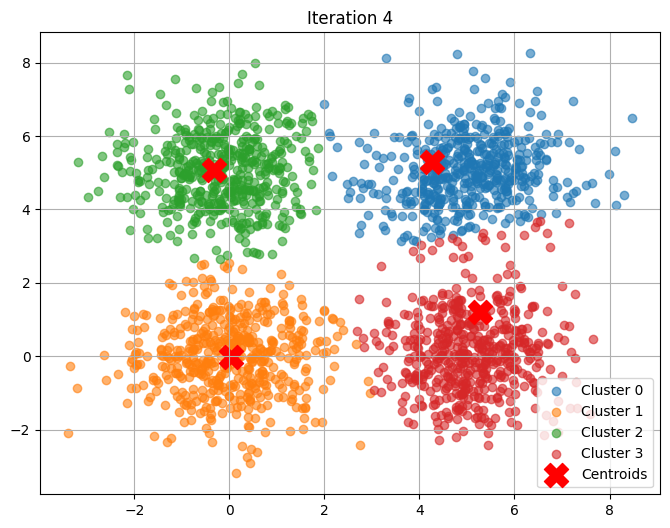

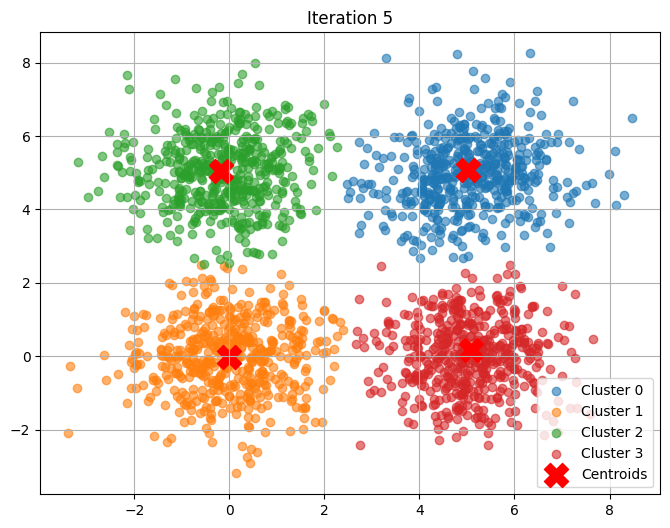

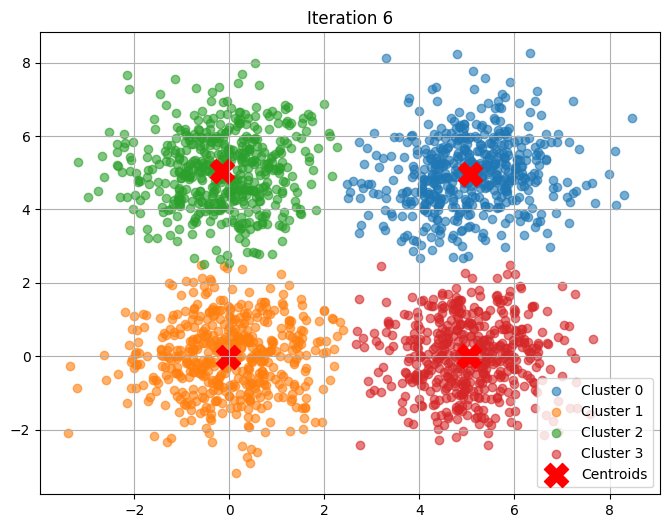

In [288]:

def plot_kmeans_iterations(kmeans):
    # Assuming kmeans is an instance of the KMeans class after fitting to data
    num_iterations = len(kmeans.centroids_history)
    X = kmeans.X_fit_
    
    for i in range(num_iterations):
        plt.figure(figsize=(8, 6))
        centroids = kmeans.centroids_history[i]  # Access centroids of the i-th iteration
        labels = kmeans.labels_history[i]  # Access labels of the i-th iteration

        for k in range(kmeans.n_clusters):
            # Plot each cluster
            cluster_points = X[labels == k]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k}', alpha=0.6)

        # Plot centroids
        plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
        plt.title(f'Iteration {i + 1}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function with your kmeans instance
plot_kmeans_iterations(kmeans)

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [289]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [290]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [291]:
class PCA:
    def __init__(self):
        self.mean = None
        self.V = None  # Eigenvectors

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)
        
        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        
        # Sort eigenvectors by eigenvalues in descending order
        idx = np.argsort(eigenvalues)[::-1]
        self.V = eigenvectors[:, idx]

    def transform(self, X, n_dimensions):
        # Project the data onto the top 'n_dimensions' eigenvectors
        X_centered = X - self.mean
        X_reduced = np.dot(X_centered, self.V[:, :n_dimensions])
        return X_reduced


Run the algorithm on MNIST dataset.

In [292]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

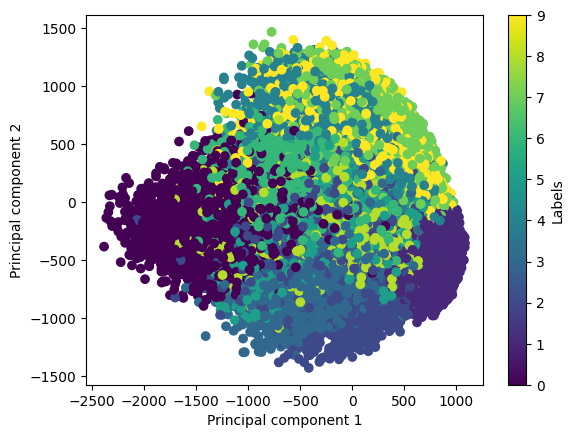

In [293]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

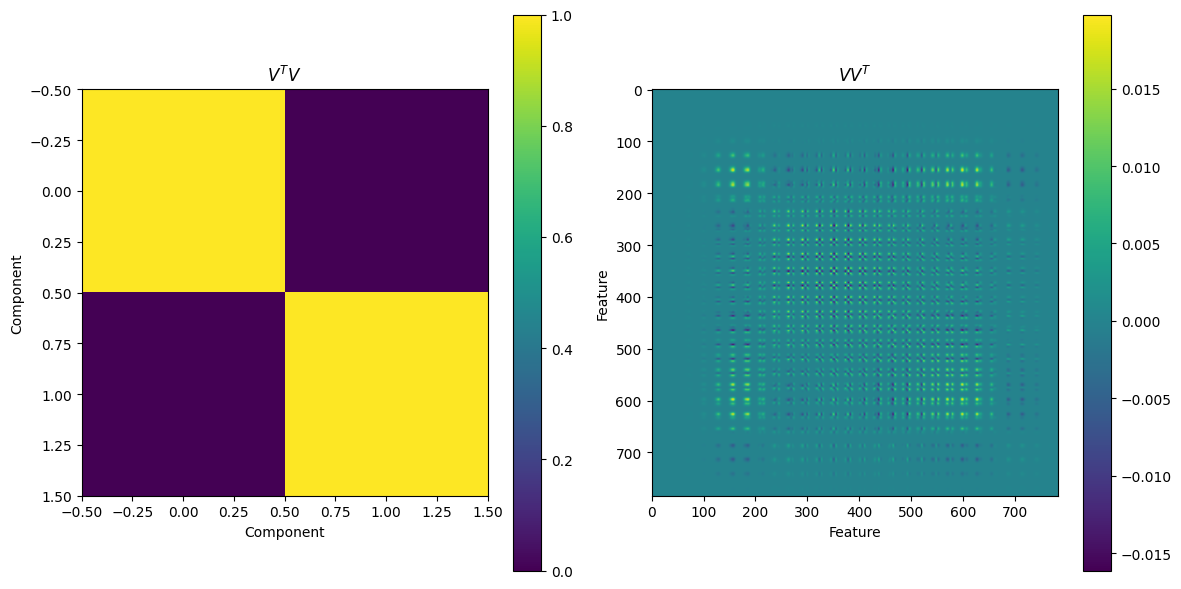

In [294]:


# Assuming self.V has been set by the PCA fit method, and we have selected r eigenvectors
r = 2  # Let's assume we are interested in the top 2 components for simplicity in visualization

# Extract the top r eigenvectors for the visualization
V = pca.V[:, :r]

# Compute V^T V and V V^T
VtV = np.dot(V.T, V)
VVt = np.dot(V, V.T)

# Plotting V^T V
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(VtV, cmap='viridis')
plt.colorbar()
plt.title(r'$V^T V$')
plt.xlabel('Component')
plt.ylabel('Component')

# Plotting V V^T
plt.subplot(1, 2, 2)
plt.imshow(VVt, cmap='viridis')
plt.colorbar()
plt.title(r'$V V^T$')
plt.xlabel('Feature')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()


Your Explanation:VV^T This matrix is the product of V  and its transpose. It represents the projection matrix onto the space spanned by the eigenvectors in 
V, VV^T is not necessarily diagonal but symmetric, with its rank being r
and the rest of the elements being zeros. The siize of VV^T is d on d

V^tV relay on the orthonormality of V
VV^t secribes the sbspace of span(V)


Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [295]:
def pca_reconstruction(x, n_dimensions, pca):
    # Center the sample
    x_centered = x - pca.mean
    
    # Project the centered sample to the n-dimensional space using top n_dimensions principal components
    V_n = pca.V[:, :n_dimensions]  # Take the first n_dimensions columns from V
    x_projected = np.dot(x_centered, V_n)
    
    # Reconstruct the sample from the projected data
    x_reconstructed = np.dot(x_projected, V_n.T)
    
    # De-center by adding the mean back to the reconstructed sample
    x_reconstructed = x_reconstructed + pca.mean
    
    return x_reconstructed


Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


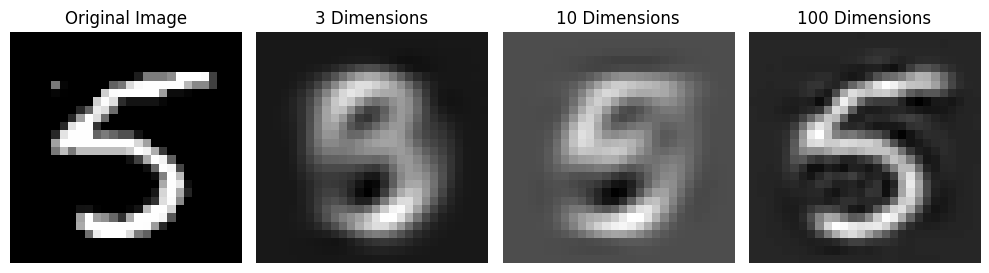

In [296]:
import random

# Function to display an image
def display_image(ax, img, title):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Sample a random image from the dataset
random_index = random.randint(0, X.shape[0] - 1)
sample_image = X[random_index]

# Dimensions to reconstruct the image
dimensions = [3, 10, 100]

# Create a plot to compare original and reconstructed images
fig, axes = plt.subplots(1, len(dimensions) + 1, figsize=(10, 5))
display_image(axes[0], sample_image, 'Original Image')

# Perform PCA reconstruction and display for each dimension
for i, n_dims in enumerate(dimensions):
    reconstructed_image = pca_reconstruction(sample_image, n_dims, pca)
    display_image(axes[i + 1], reconstructed_image, f'{n_dims} Dimensions')

plt.tight_layout()
plt.show()